# Python3 - Example 2

This document is an exercise for myself to learn the fundamentals of Jupyter Notebooks (JN). To date, I've used R Markdown and have been very happy with the amount of control you have in formatting. My first impressions are that while JN are a more generic tool, they do lack some features. These are the features I have not yet learnt to do, but would like to see (all of these can be done easily using R Markdown):
1. Provide an easy way to decide whether to show code or not. The methods I've seen to date are limited only to rendered HTML.
2. Include the result of a calculation into a Markdown section.
3. Include a table of contents.

## Package Requirements

The following [Python(3)](https://www.python.org/) packages are used in this example:

* sklearn (python3-sklearn)
* numpy
* pandas
* matplotlib

The data comes from the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset sourced from the sklearn package.

## Using a scikit learn DataSet

Using dataset from [scikit-learn](http://scikit-learn.org/stable/):

In [1]:
# import the datasets package
from sklearn import datasets

# pull in the iris data
ds = datasets.load_iris()

# grab the first four columns of data of just the setosa species
X = ds.data[0:50, :4]

# calculate some basic statistics
XCount = len(X)
XMin = X[:, 0].min()
XMax = X[:, 0].max()
XMean = round(X[:, 0].mean(), 2)

# display our results
XCount, XMin, XMax, XMean

(50, 4.3, 5.8, 5.01)

### More Information

To show additional information on this Iris dataset, use:
```python
ds.DESCR
```

## Using a Pandas DataFrame

This version, imports the dataset into a [Pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe). To map the data types the dataframe is built in two stages, the first to import all numeric data, then the categorical class data is appended.

In [2]:
from sklearn import datasets

import pandas as pd
import numpy as np

Load the iris data:

In [3]:
ds = datasets.load_iris()

Get the species names from the dataset.

In [4]:
names = ds['target_names']
list(names)

['setosa', 'versicolor', 'virginica']

Convert Iris dataset to a dataframe (using species name as the index):

In [5]:
df = pd.DataFrame(
        data = np.c_[ds['data']],
        columns = ds['feature_names'],
        dtype = 'float64',
        index = names[ds['target']]
     )

Sample from each species (by location in dataframe):

In [6]:
rows = list(range(3)) + list(range(51,54)) + list(range(101,104))
print(list(rows))
df.iloc[list(rows),:]

[0, 1, 2, 51, 52, 53, 101, 102, 103]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
versicolor,6.4,3.2,4.5,1.5
versicolor,6.9,3.1,4.9,1.5
versicolor,5.5,2.3,4.0,1.3
virginica,5.8,2.7,5.1,1.9
virginica,7.1,3.0,5.9,2.1
virginica,6.3,2.9,5.6,1.8


Now split dataframe by species so we can get summary statistics:

In [7]:
byspecies = df.groupby(df.index)

And summarise by species:

In [8]:
byspecies.describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)        ...  petal length (cm)       \
                      count   mean ...                75%  max   
setosa                 50.0  3.418 ...              1.575  1.9   
versicolor             50.0  2.770 ...              4.600  5.1   
virginica              50.0  2.974 ...              5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
setosa                 50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Or show summary of just one feature across all species:

In [9]:
byspecies['sepal length (cm)'].describe()

,count,mean,std,min,25%,50%,75%,max
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


Or show summary of just one feature for one species:

In [10]:
byspecies.get_group('setosa')['sepal length (cm)'].describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal length (cm), dtype: float64

### More Information

The basics of the above was learnt from [Summarizing Data in Python with Pandas](https://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/) by Brian Connelly.

You can get more dataframe information using:
```python
df.head(10)
df.columns
df.dtypes
df.info
```

## Plot

To plot the sepal length vs width by species. First we will use the scikit dataset:

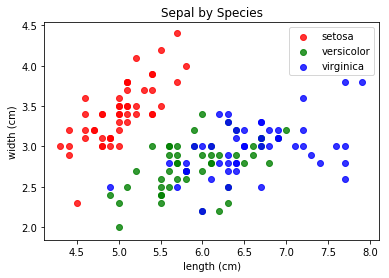

In [11]:
# ensure plot created inline
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets

ds = datasets.load_iris()

X = ds.data[:, :2]    # consider only first 2 columns sepal width and length
y = ds.target         # index to species 
names = ds.target_names #  distinct species
colours = ("red", "green", "blue")

# create a scatter
plt.figure()
plt.clf()               # clear figure

# colour and label each species
for c, i, n in zip(colours, [0, 1, 2], names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=c, alpha=0.8, label=n)

plt.title('Sepal by Species')
plt.xlabel('length (cm)')
plt.ylabel('width (cm)')
plt.legend()
plt.show()

You can save the figure generated above with:
```python
plt.savefig("sepal.png")
```

## Export as Document

To export this document as $LaTeX$ run the command:

```bash
jupyter nbconvert --to=latex python3-example-2.ipynb
```